# 1. Importing the dependencies

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib 

# 2. Data Collection and Processing

In [169]:
# Load the dataset
data = pd.read_csv('Rainfall.csv')
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [170]:
data.shape

(366, 12)

In [171]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [172]:
print("Data information:")
data.info()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [173]:
# remove extra spaces in column names
data.columns = data.columns.str.strip()

In [174]:
data = data.drop(columns=["day"])



In [175]:
# checking the missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [176]:
# handling missing values
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean())

In [177]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [178]:
# Convert categorical variables to numerical

data["rainfall"] = data["rainfall"].replace("no", 0)
data["rainfall"] = data["rainfall"].replace("yes", 1)

C:\Users\thean\AppData\Local\Temp\ipykernel_7392\3061704522.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["rainfall"] = data["rainfall"].replace("yes", 1)


In [179]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


# 3. EDA - Exploratory Data Analysis

In [180]:
data.shape

(366, 11)

In [181]:
# setting the plot style
sns.set(style="whitegrid")

In [182]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.536986
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.055908
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [183]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

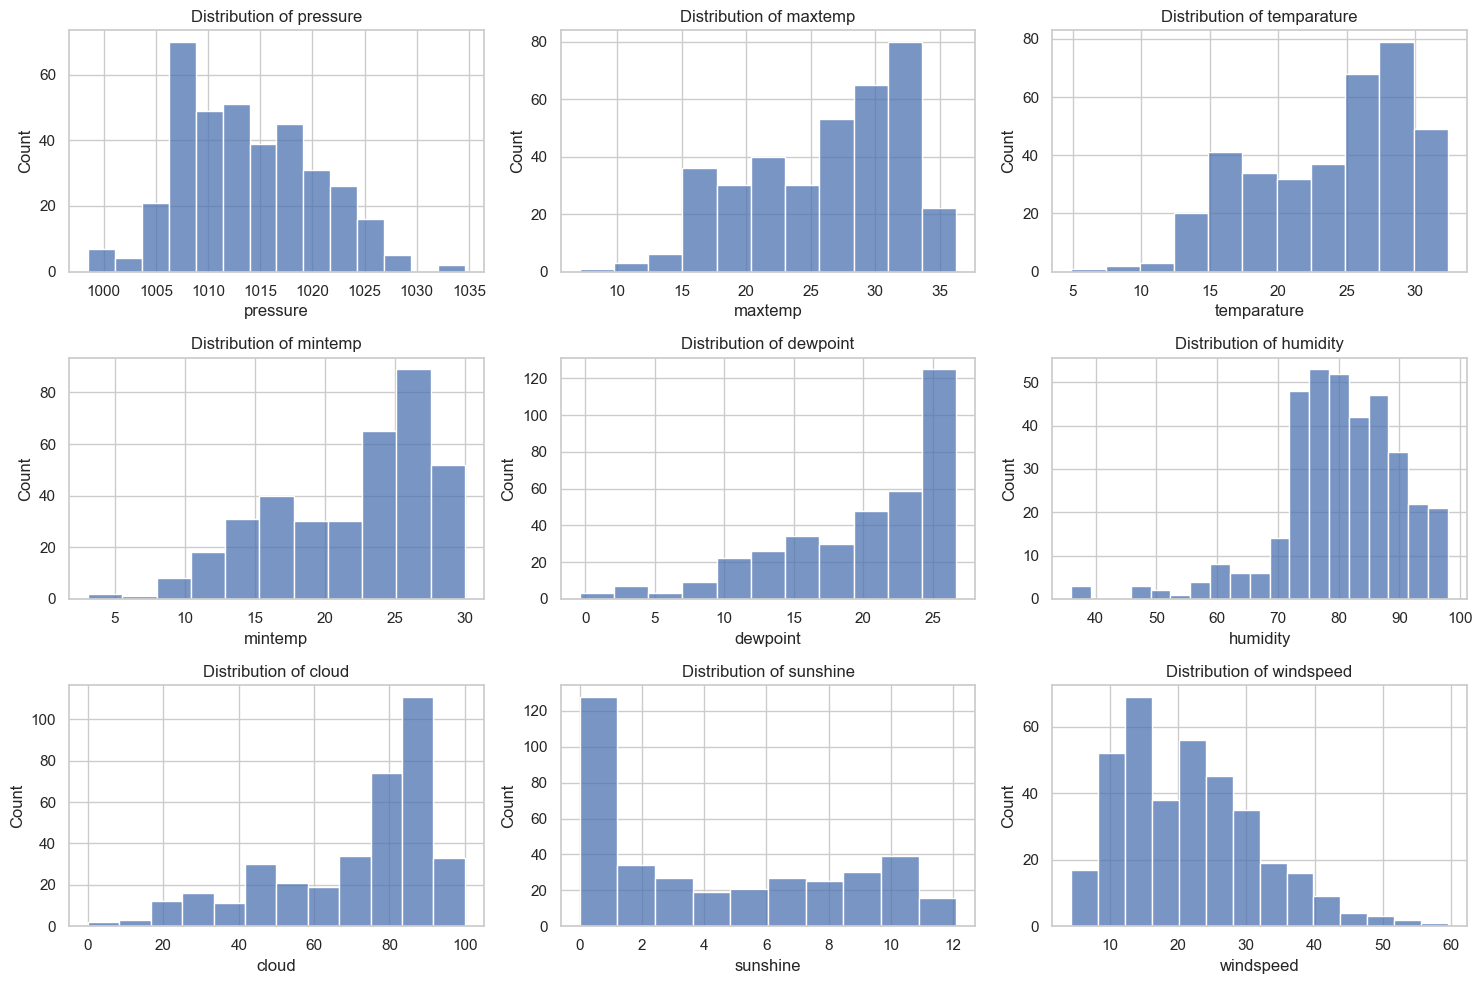

In [184]:
cols = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
        'humidity', 'cloud', 'sunshine', 'windspeed']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)  # i+1 because subplot index starts at 1
    sns.histplot(data[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Rainfall Distribution')

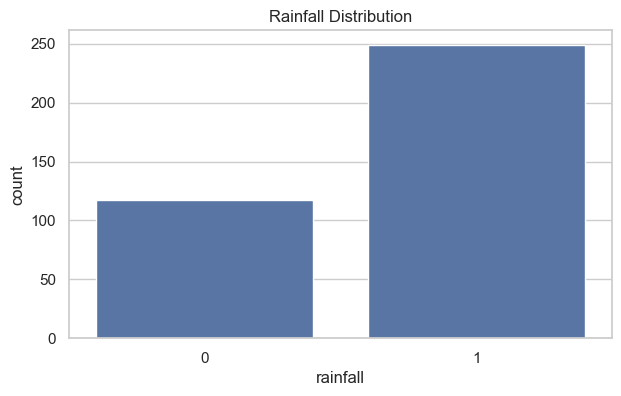

In [185]:
plt.figure(figsize=(7, 4))
sns.countplot(x='rainfall', data=data)
plt.title('Rainfall Distribution')


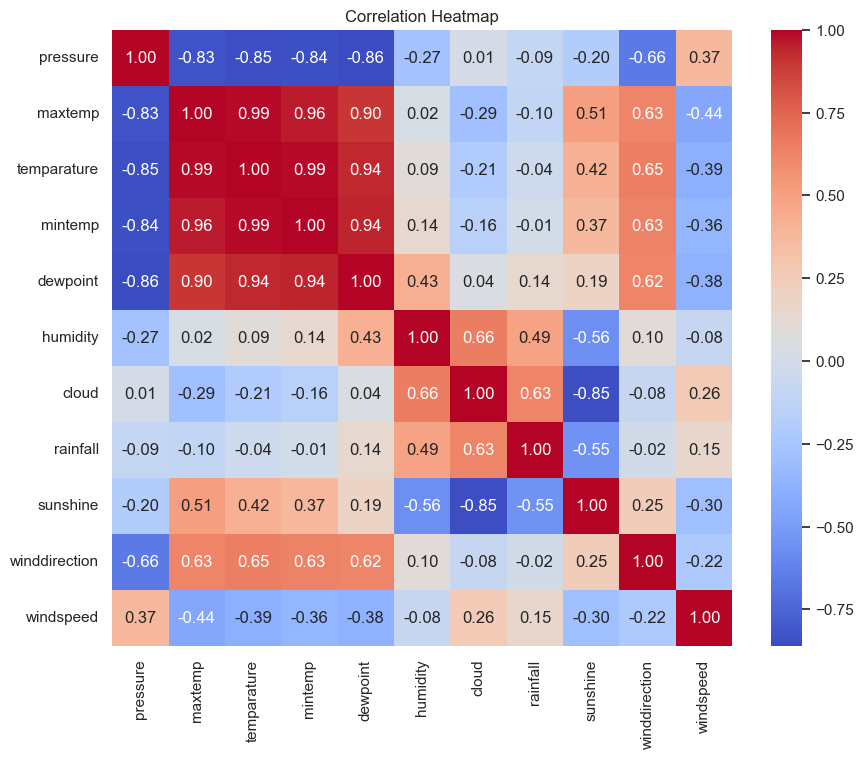

In [186]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

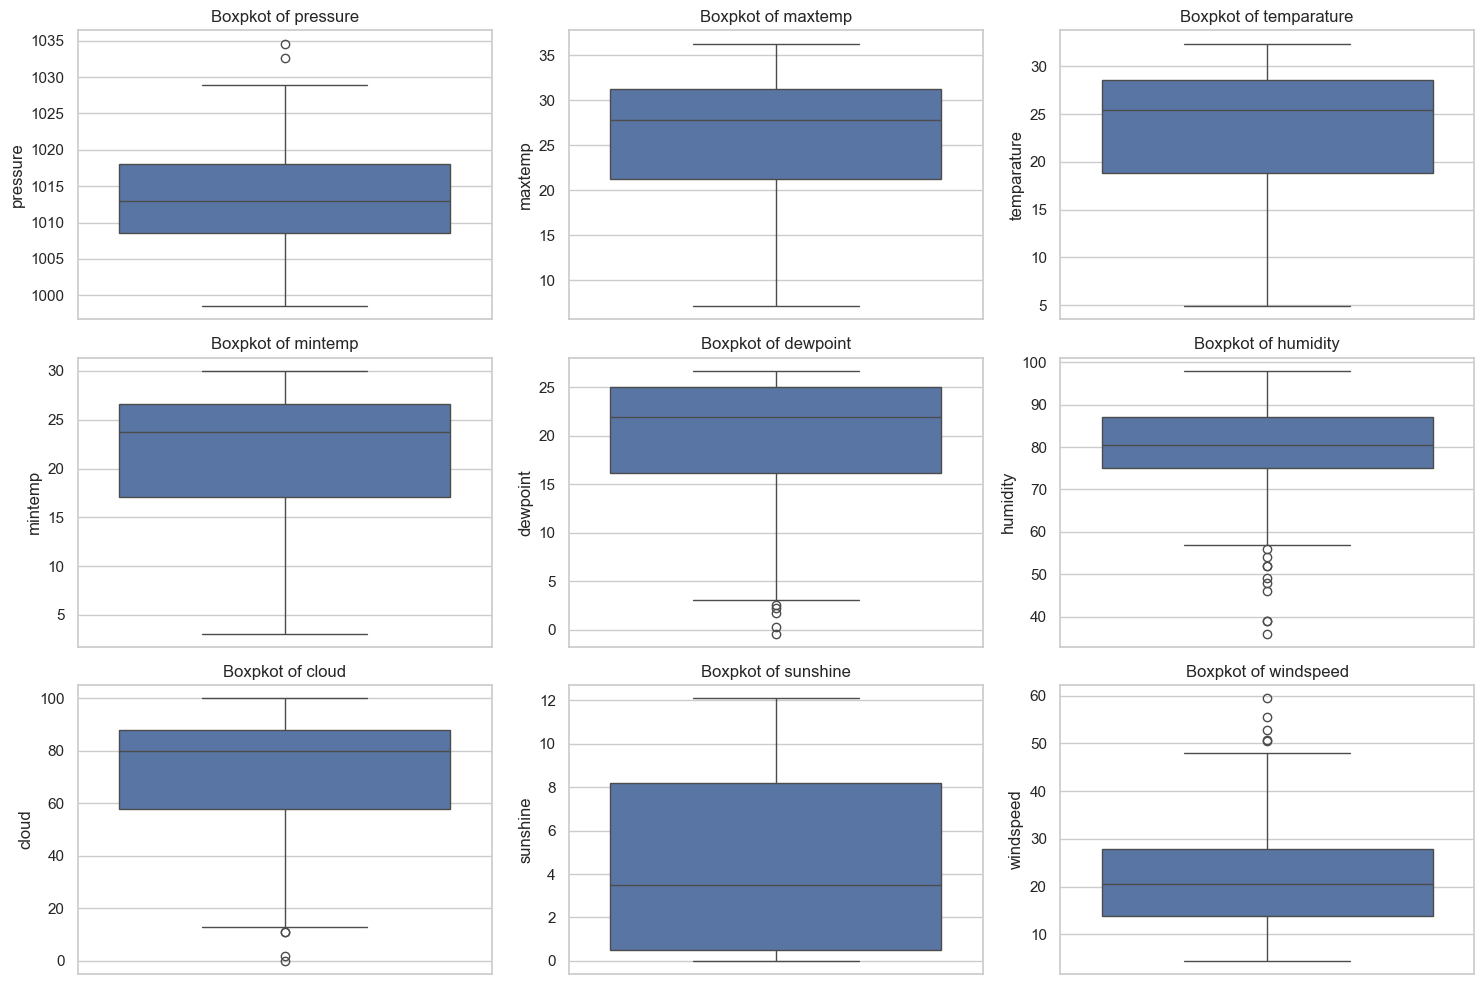

In [187]:
# checking for outliers using boxplots

cols = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
        'humidity', 'cloud', 'sunshine', 'windspeed']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)  # i+1 because subplot index starts at 1
    sns.boxplot(data[col])
    plt.title(f'Boxpkot of {col}')
plt.tight_layout()
plt.show()

# 4. Data Preprocessing

In [188]:
# drop the multicollinearity columns
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [189]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [190]:
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [191]:
# separate majority and minority classes
df_majority = data[data['rainfall'] == 1]  
df_minority = data[data['rainfall'] == 0]
print("Majority class shape:", df_majority.shape)
print("Minority class shape:", df_minority.shape)

Majority class shape: (249, 8)
Minority class shape: (117, 8)


In [192]:
# downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False, n_samples=len(df_minority),
                                   random_state=42)


In [193]:
df_majority_downsampled.shape

(117, 8)

In [194]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.shape
df_downsampled.tail()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
351,1025.9,-0.4,39,25,0,9.1,20.0,35.6
352,1026.4,3.1,48,11,0,9.5,40.0,25.2
353,1025.4,8.7,62,71,0,2.1,30.0,29.0
360,1020.6,13.3,74,87,0,0.6,30.0,21.6
365,1026.4,13.0,74,66,0,5.7,20.0,23.3


In [195]:
# shuffle the dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [196]:
df_downsampled["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [197]:
# Split the dataset into features and target variable
X = df_downsampled.drop(columns=['rainfall'])   
y = df_downsampled['rainfall']

In [198]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training

In [204]:
rf = RandomForestClassifier( random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],    
    'min_samples_leaf': [1, 2, 4]
}


In [205]:
# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\thean\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
386 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\thean\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\thean\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\thean\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    val

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [206]:
best_rf = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


# 6. Model Evaluation

In [207]:
cv_score = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Cross-validation scores: ", cv_score)
print("Mean cross-validation score: ", np.mean(cv_score))

Cross-validation scores:  [0.68421053 0.84210526 0.83783784 0.83783784 0.91891892]
Mean cross-validation score:  0.8241820768136557


In [208]:
# test the model on the test set
y_pred = best_rf.predict(X_test)
print("Test set accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test set accuracy:  0.7446808510638298
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

Confusion Matrix:
 [[17  7]
 [ 5 18]]


In [213]:
# save the model
joblib.dump(best_rf, 'rainfall_prediction_model.pkl')

['rainfall_prediction_model.pkl']

# 7. Prediction system

In [214]:
# load the model
loaded_model = joblib.load('rainfall_prediction_model.pkl')

In [215]:
input_data = {
    "pressure": 1022.2,
    "dewpoint": 14.1,
    "humidity": 78,
    "cloud": 90,
    "sunshine": 0.0,
    "winddirection": 30.0,
    "windspeed": 28.5
}
df = pd.DataFrame([input_data])
df.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,0.0,30.0,28.5


In [216]:
prediction = loaded_model.predict(df)
if prediction[0] == 1:
    print("Rain is expected.")  
else:
    print("No rain is expected.")

Rain is expected.
